Import Library yang dibutuhkan

In [1248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, r2_score

import joblib

Membuka data dan menampilkan 5 teratas

In [1249]:
df = pd.read_csv("cardekho.csv")
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3        90    5.0  
4      88.2    5.0

Menampilkan informasi statistik pada tiap-tiap kolom

In [1250]:
df.describe()

year  selling_price     km_driven  mileage(km/ltr/kg)  \
count  8128.000000   8.128000e+03  8.128000e+03         7907.000000   
mean   2013.804011   6.382718e+05  6.981951e+04           19.418783   
std       4.044249   8.062534e+05  5.655055e+04            4.037145   
min    1983.000000   2.999900e+04  1.000000e+00            0.000000   
25%    2011.000000   2.549990e+05  3.500000e+04           16.780000   
50%    2015.000000   4.500000e+05  6.000000e+04           19.300000   
75%    2017.000000   6.750000e+05  9.800000e+04           22.320000   
max    2020.000000   1.000000e+07  2.360457e+06           42.000000   

            engine        seats  
count  7907.000000  7907.000000  
mean   1458.625016     5.416719  
std     503.916303     0.959588  
min     624.000000     2.000000  
25%    1197.000000     5.000000  
50%    1248.000000     5.000000  
75%    1582.000000     5.000000  
max    3604.000000    14.000000

Mari kita cek ada berapa missing value pada tiap tiap kolom

In [1251]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

Melakukan imputasi pada missing value kolom engan 'mean'

In [1252]:
imputed_column_float = ["mileage(km/ltr/kg)","engine","seats"]
df[imputed_column_float] = df[imputed_column_float].fillna(df[imputed_column_float].mean())

df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

Pada kolom 'max_power' diisi menggunakan 'modus'

In [1253]:
df['max_power'] = df["max_power"].fillna(df["max_power"].mode()[0])
df.isnull().sum()


name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

Mengambil nama-nama kolom bertipe string atau object

In [1254]:
textual_columns = df.select_dtypes(include = ['object']).columns
textual_columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power'], dtype='object')

In [1255]:
df[textual_columns]

name    fuel seller_type transmission  \
0           Maruti Swift Dzire VDI  Diesel  Individual       Manual   
1     Skoda Rapid 1.5 TDI Ambition  Diesel  Individual       Manual   
2         Honda City 2017-2020 EXi  Petrol  Individual       Manual   
3        Hyundai i20 Sportz Diesel  Diesel  Individual       Manual   
4           Maruti Swift VXI BSIII  Petrol  Individual       Manual   
...                            ...     ...         ...          ...   
8123             Hyundai i20 Magna  Petrol  Individual       Manual   
8124         Hyundai Verna CRDi SX  Diesel  Individual       Manual   
8125        Maruti Swift Dzire ZDi  Diesel  Individual       Manual   
8126               Tata Indigo CR4  Diesel  Individual       Manual   
8127               Tata Indigo CR4  Diesel  Individual       Manual   

                     owner max_power  
0              First Owner        74  
1             Second Owner    103.52  
2              Third Owner        78  
3              First Owner        90  
4              First Owner      88.2  
...                    ...       ...  
8123           First Owner     82.85  
8124  Fourth & Above Owner       110  
8125           First Owner      73.9  
8126           First Owner        70  
8127           First Owner        70  

[8128 rows x 6 columns]

Melakukan ekstrak data pada kolom 'name' untuk mendapatkan fitur kategori lebih sederhana

In [1256]:
df['brand'] = df['name'].str.split().str[0]
df['brand'] = df['brand'].astype('object')
df.head()


name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats    brand  
0        74    5.0   Maruti  
1    103.52    5.0    Skoda  
2        78    5.0    Honda  
3        90    5.0  Hyundai  
4      88.2    5.0   Maruti

Drop kolom 'name'

In [1257]:
df.drop(['name'],axis=1, inplace=True)

Mengubah tipe data pada kolom 'max_power' menjadi numerik(float)

In [1258]:
spaces_count = df['max_power'].apply(lambda x: x.count(' ')).sum()
spaces_count

1

In [1259]:
# Replace each space with string zero
df['max_power'] = df['max_power'].str.replace(' ', '0')

In [1260]:
# Convert max power column from textual into numerical
df['max_power'] = df['max_power'].astype(float)

In [1261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                8128 non-null   int64  
 1   selling_price       8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  8128 non-null   float64
 8   engine              8128 non-null   float64
 9   max_power           8128 non-null   float64
 10  seats               8128 non-null   float64
 11  brand               8128 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [1262]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage(km/ltr/kg)  engine  max_power  seats    brand  
0   First Owner               23.40  1248.0      74.00    5.0   Maruti  
1  Second Owner               21.14  1498.0     103.52    5.0    Skoda  
2   Third Owner               17.70  1497.0      78.00    5.0    Honda  
3   First Owner               23.00  1396.0      90.00    5.0  Hyundai  
4   First Owner               16.10  1298.0      88.20    5.0   Maruti

In [1263]:
categori_col = df.select_dtypes(include=['object'])
categori_col.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fuel          8128 non-null   object
 1   seller_type   8128 non-null   object
 2   transmission  8128 non-null   object
 3   owner         8128 non-null   object
 4   brand         8128 non-null   object
dtypes: object(5)
memory usage: 317.6+ KB


Memisahkan fitur berdasarkan numerik dan kategori

In [1264]:
numeric_feature = ['year','selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power','seats']
categori = ['brand','fuel', 'seller_type', 'transmission', 'owner']


Visualisasi data dengan boxplot untuk mendeteksi outliers pada fitur numerik

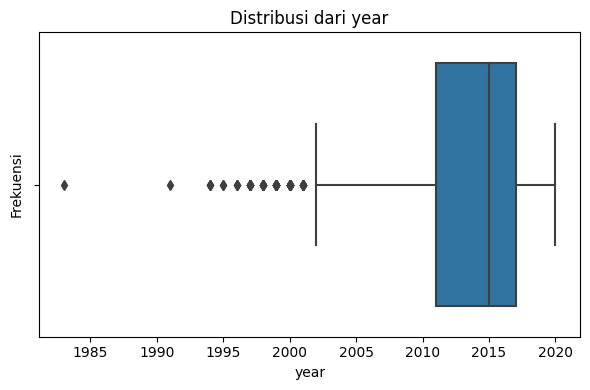

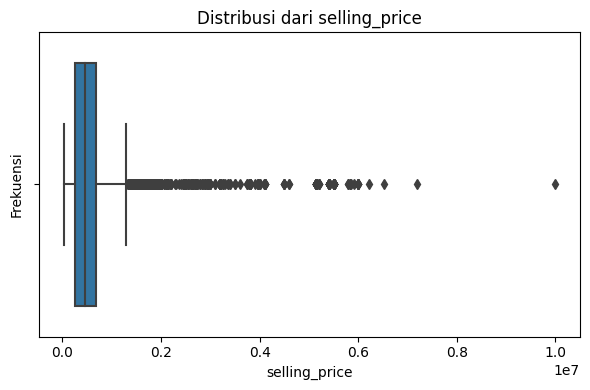

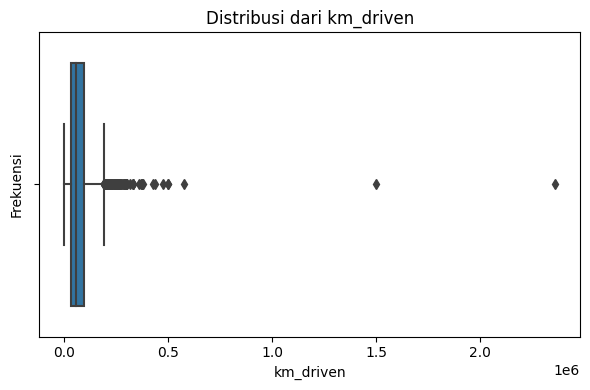

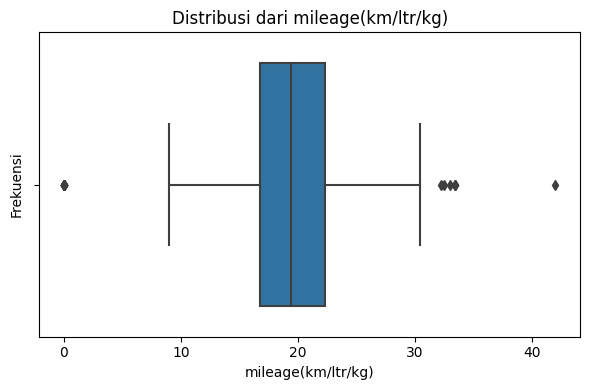

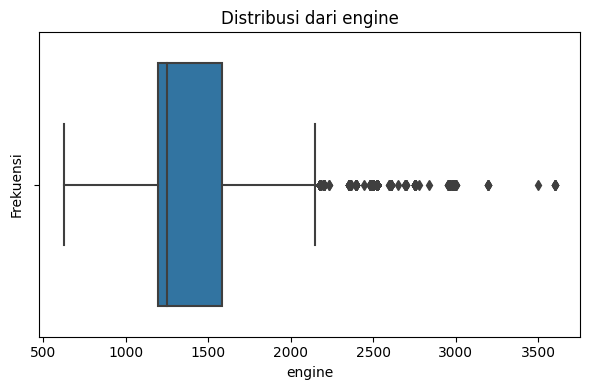

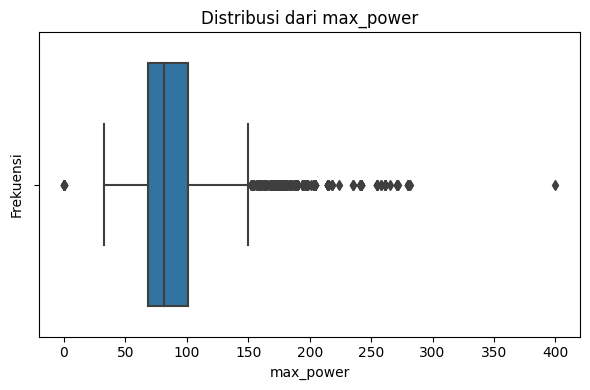

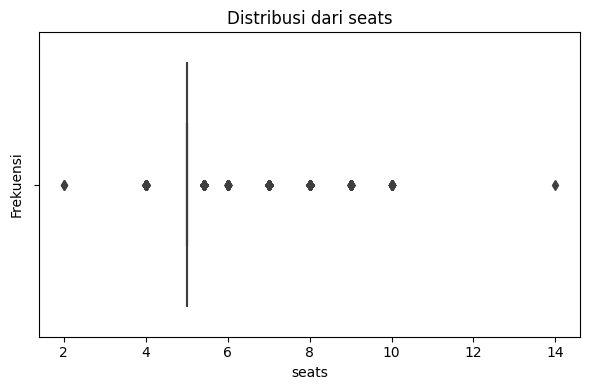

In [1265]:
for col in numeric_feature:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Distribusi dari {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

Mengatasi outlier menggunakan metode IQR

In [1266]:
# Ambil hanya kolom numerikal
numeric_cols = numeric_feature
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df.shape

(5639, 12)

Visualisasi distribusi data kategori pada kolom 


Distribusi untuk fitur: brand
               jumlah sampel  persentase
brand                                   
Maruti                  2047        36.3
Hyundai                 1325        23.5
Tata                     505         9.0
Honda                    414         7.3
Ford                     363         6.4
Renault                  204         3.6
Volkswagen               173         3.1
Chevrolet                165         2.9
Toyota                   126         2.2
Skoda                     93         1.6
Nissan                    79         1.4
Datsun                    51         0.9
Mahindra                  47         0.8
Fiat                      40         0.7
Mitsubishi                 2         0.0
Ambassador                 2         0.0
Kia                        1         0.0
Volvo                      1         0.0
Mercedes-Benz              1         0.0


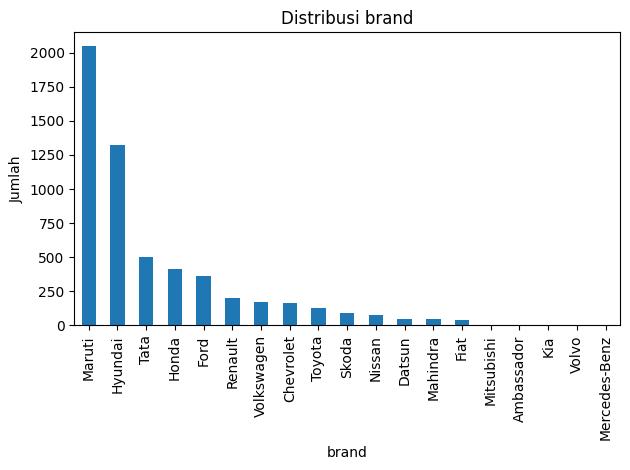


Distribusi untuk fitur: fuel
        jumlah sampel  persentase
fuel                             
Petrol           3078        54.6
Diesel           2483        44.0
CNG                44         0.8
LPG                34         0.6


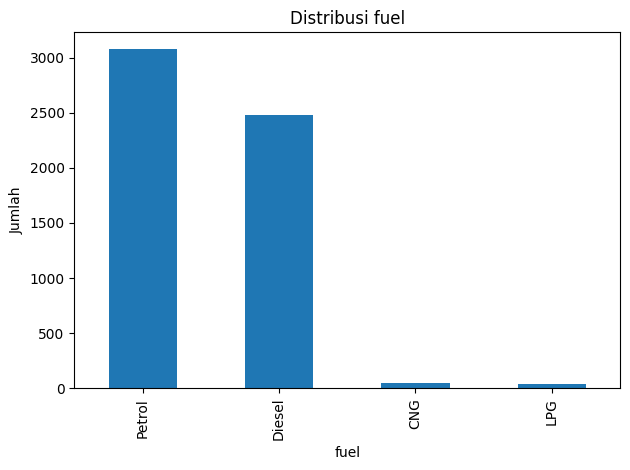


Distribusi untuk fitur: seller_type
                  jumlah sampel  persentase
seller_type                                
Individual                 4806        85.2
Dealer                      660        11.7
Trustmark Dealer            173         3.1


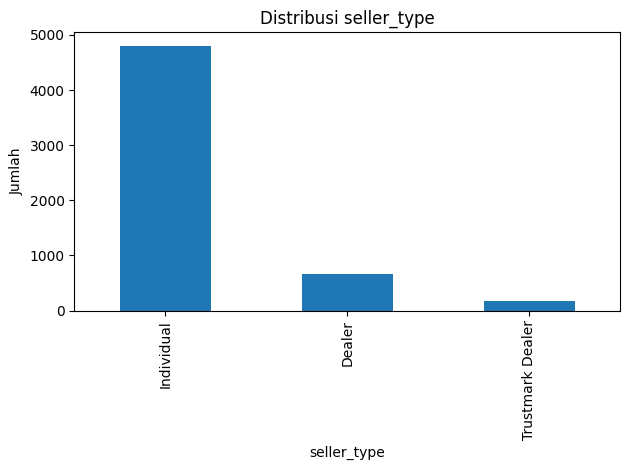


Distribusi untuk fitur: transmission
              jumlah sampel  persentase
transmission                           
Manual                 5191        92.1
Automatic               448         7.9


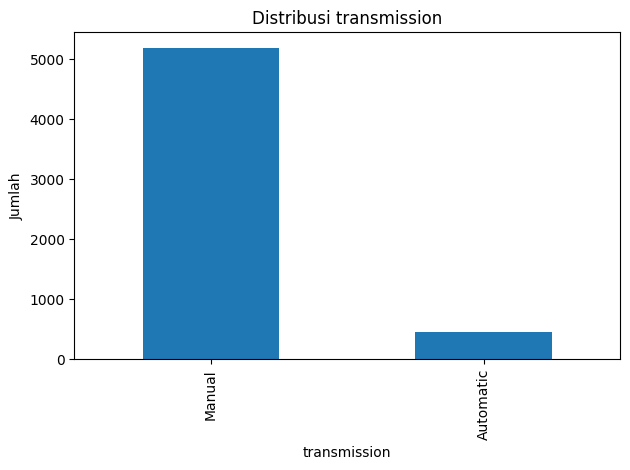


Distribusi untuk fitur: owner
                      jumlah sampel  persentase
owner                                          
First Owner                    3737        66.3
Second Owner                   1422        25.2
Third Owner                     376         6.7
Fourth & Above Owner            104         1.8


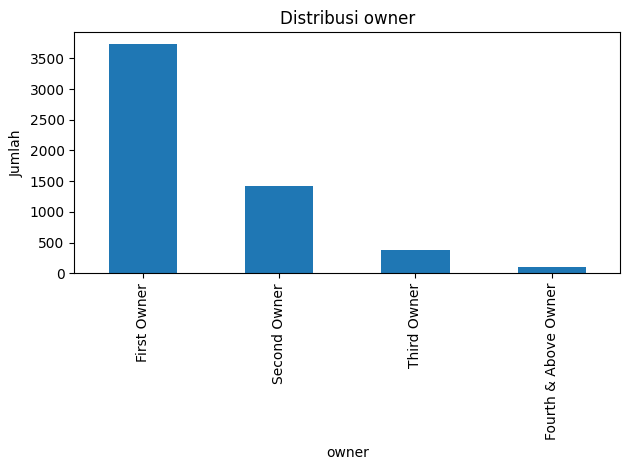

In [1267]:
for feature in categori:
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    
    summary_df = pd.DataFrame({
        'jumlah sampel': count,
        'persentase': percent.round(1)
    })

    print(f"\nDistribusi untuk fitur: {feature}")
    print(summary_df)

    count.plot(kind='bar', title=f'Distribusi {feature}')
    plt.ylabel('Jumlah')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()
    


Pada tahap ini, kita akan mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

c:\Users\GILBERT\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\GILBERT\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\GILBERT\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\GILBERT\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\GILBERT\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


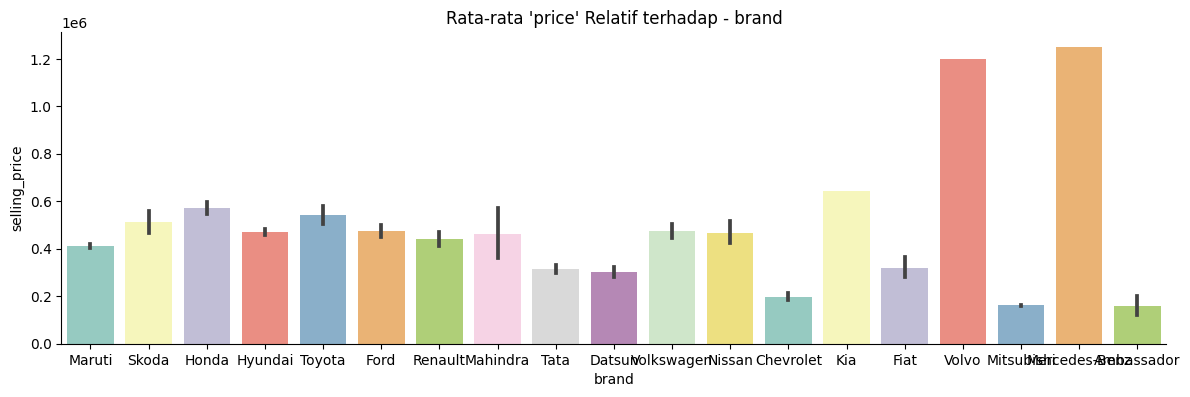

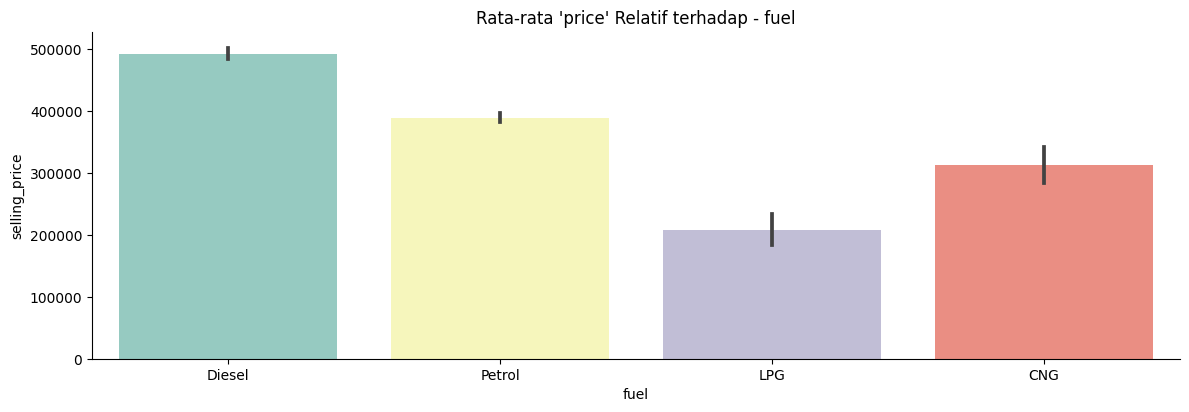

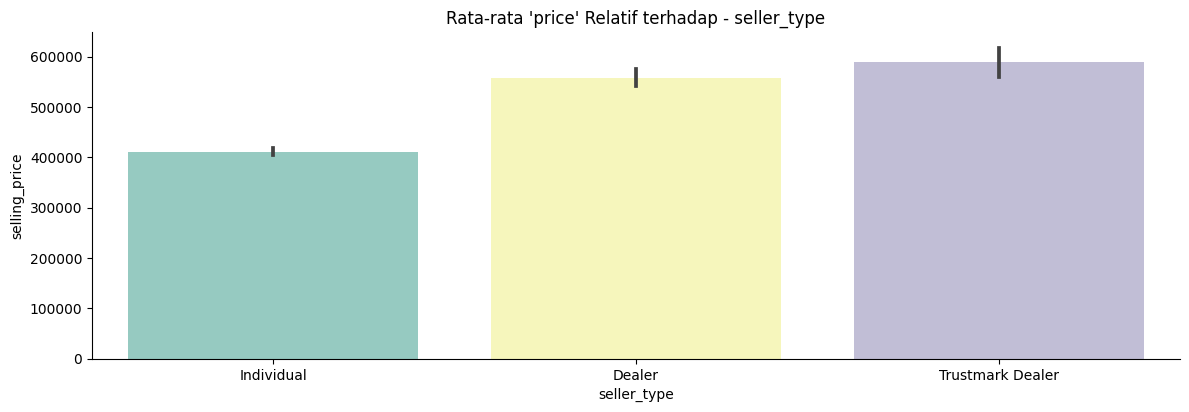

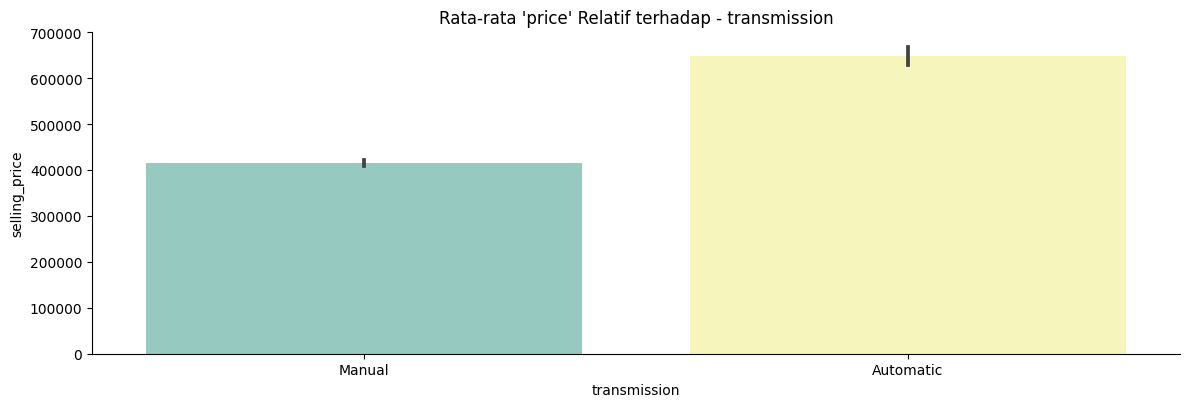

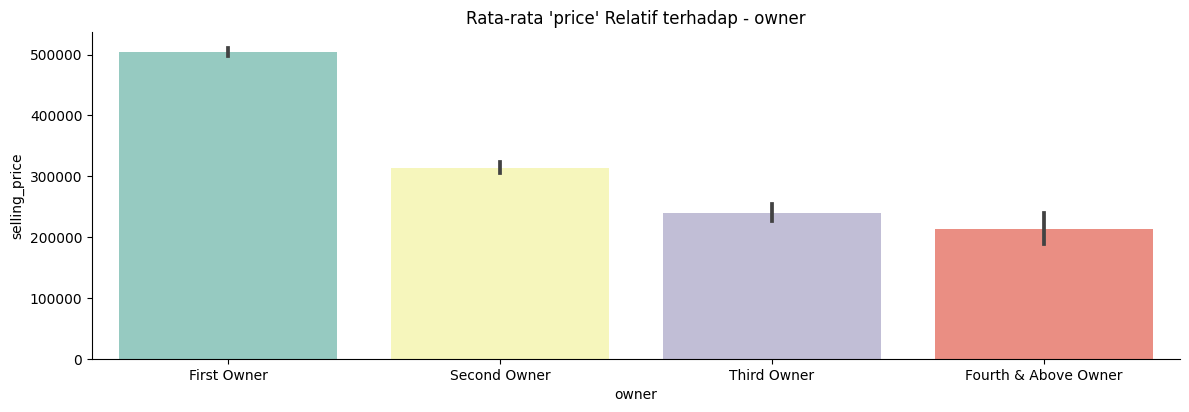

In [1268]:
cat_features = categori
for col in cat_features:
  sns.catplot(x=col, y="selling_price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))
  

Melihat histogram pada fitur numerik

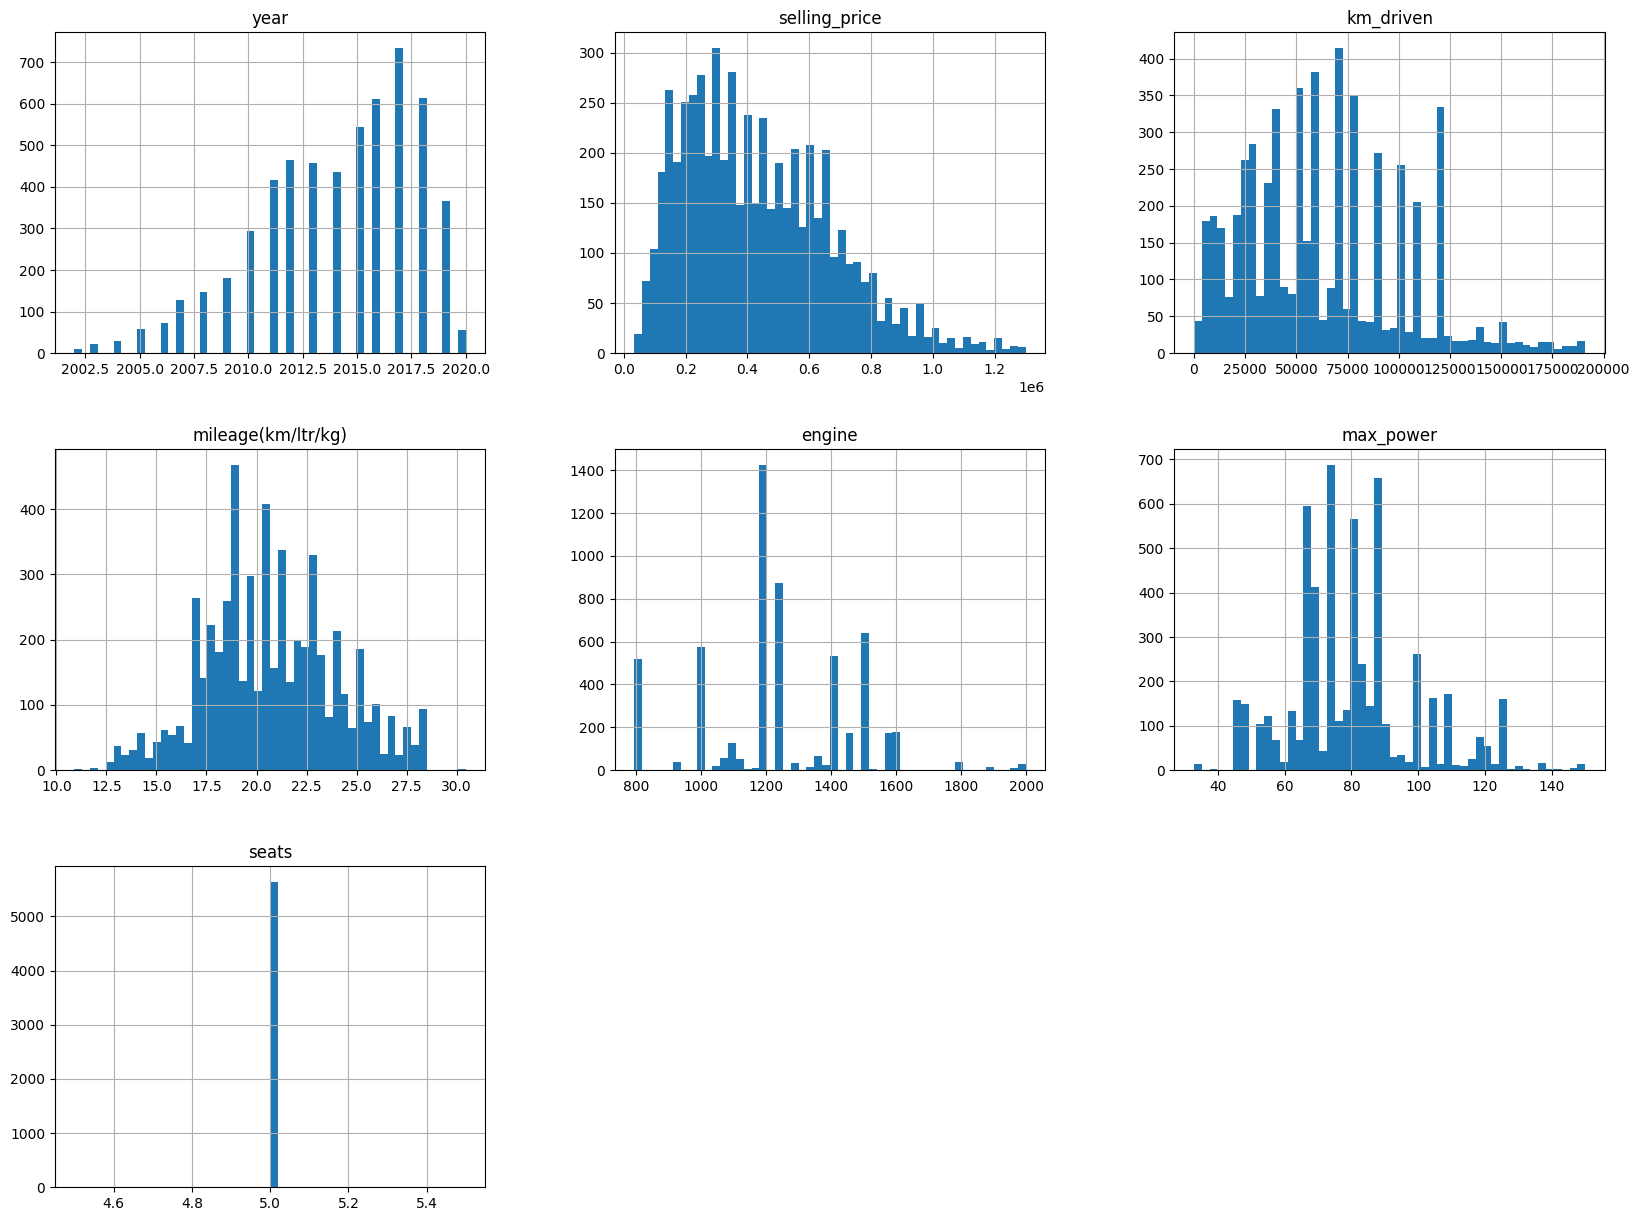

In [1269]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Mengamati hubungan antar fitur numerik dengan fungsi pairplot()

c:\Users\GILBERT\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


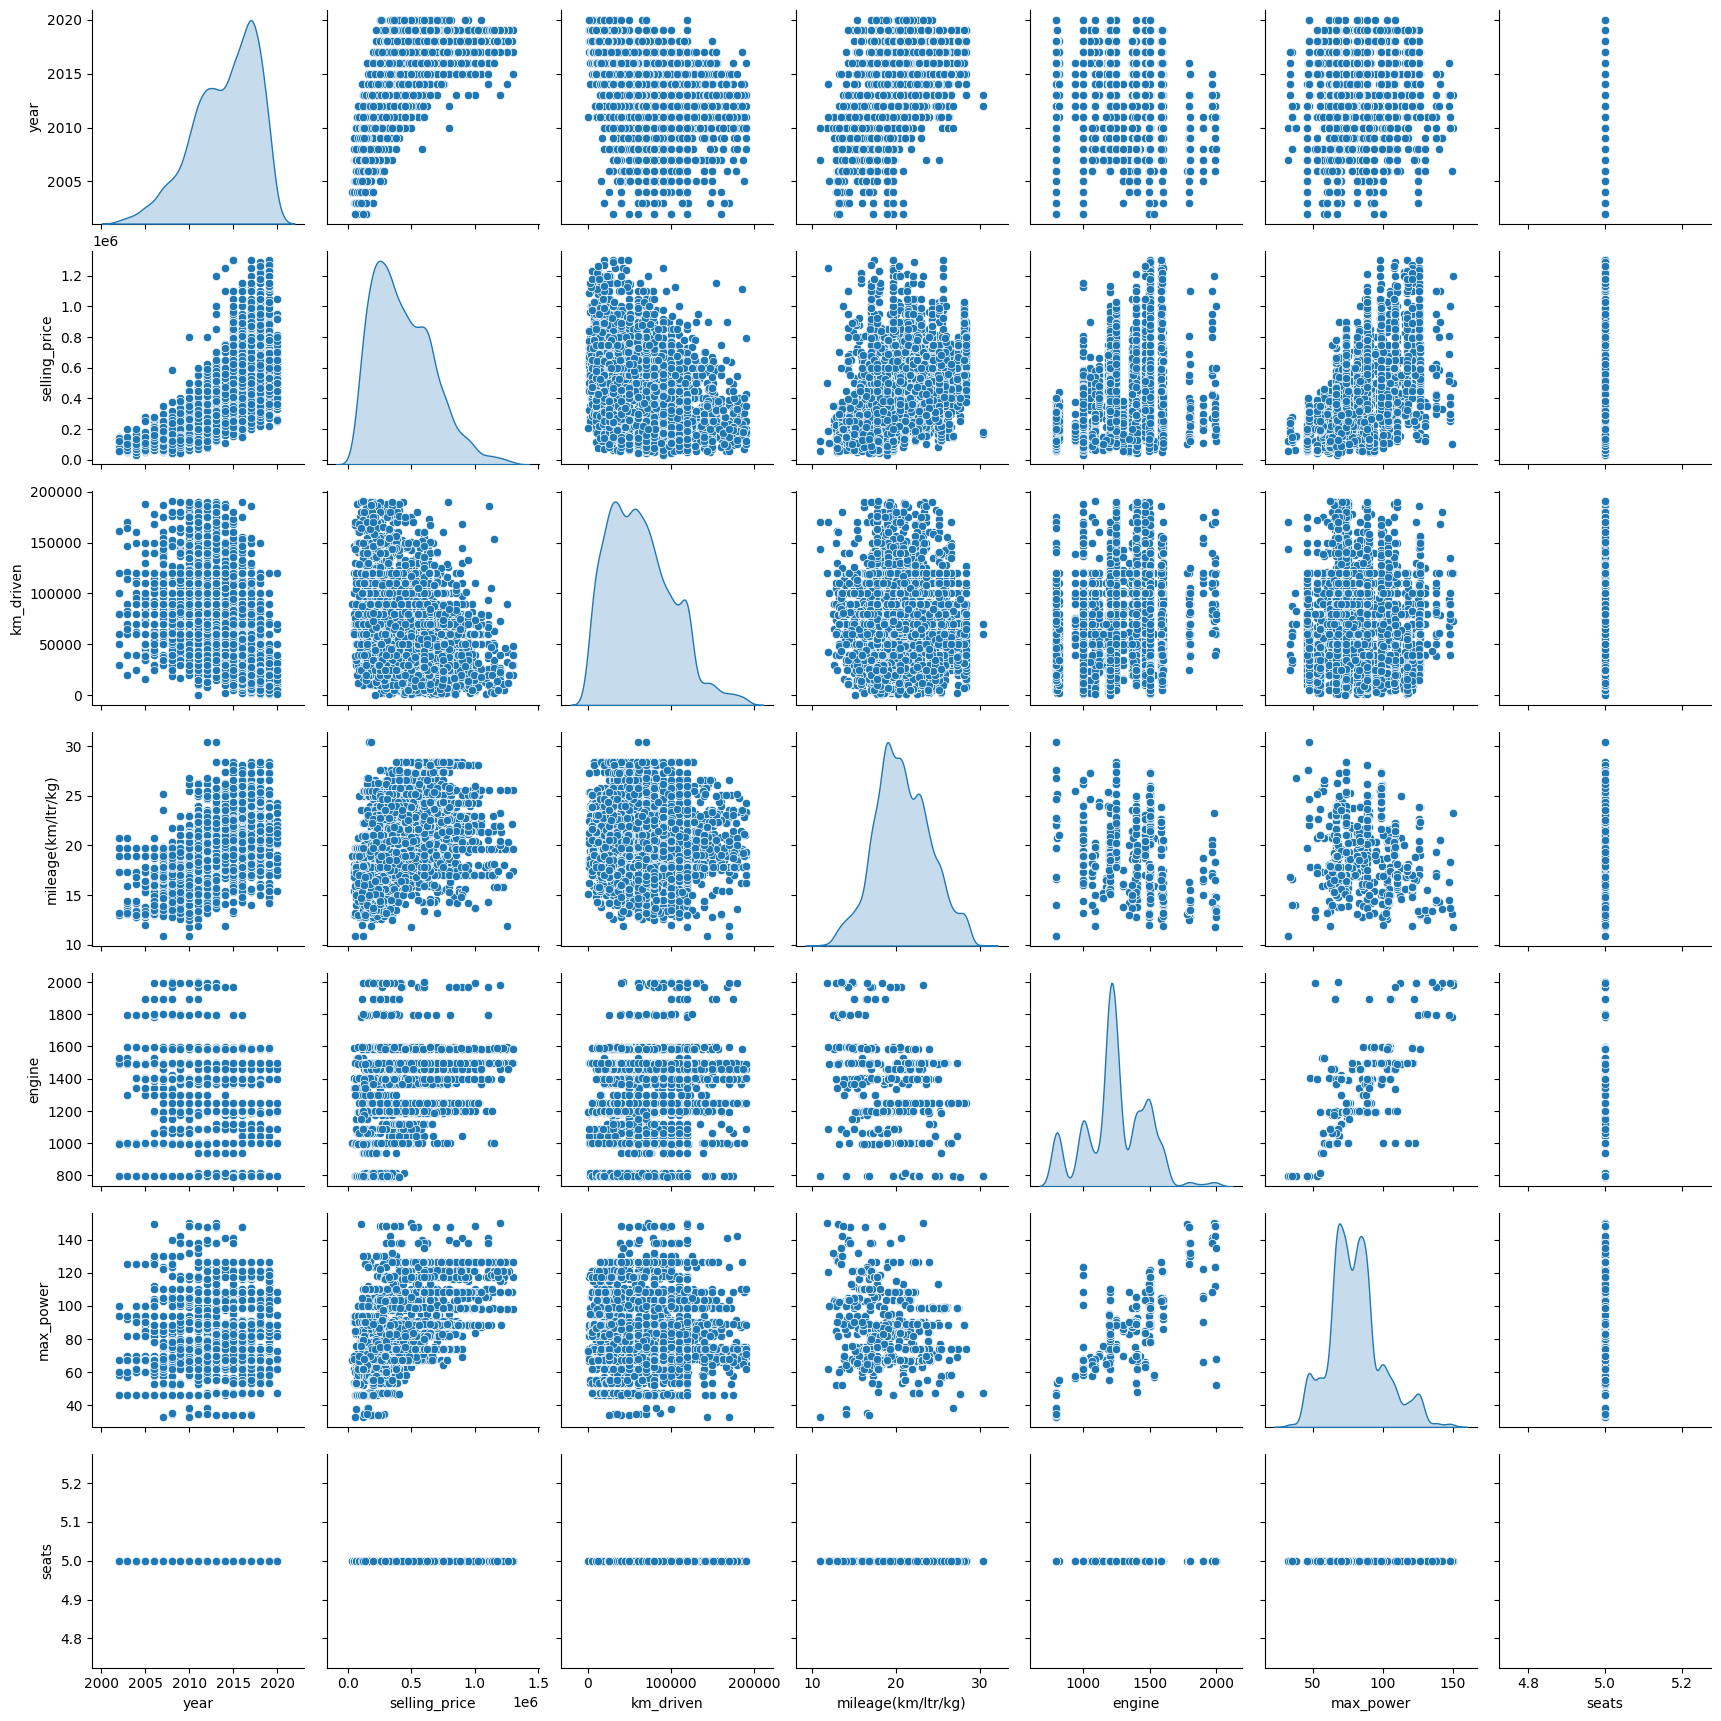

In [1270]:

sns.pairplot(df, diag_kind = 'kde')

Pada pola sebaran data grafik pairplot sebelumnya, terlihat ‘mileage(km/ltr/kg)’, ‘km_driven’, ‘year’ memiliki korelasi yang tinggi dengan fitur "selling_price"

Sedangkan fitur lainnya yaitu  terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.  

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

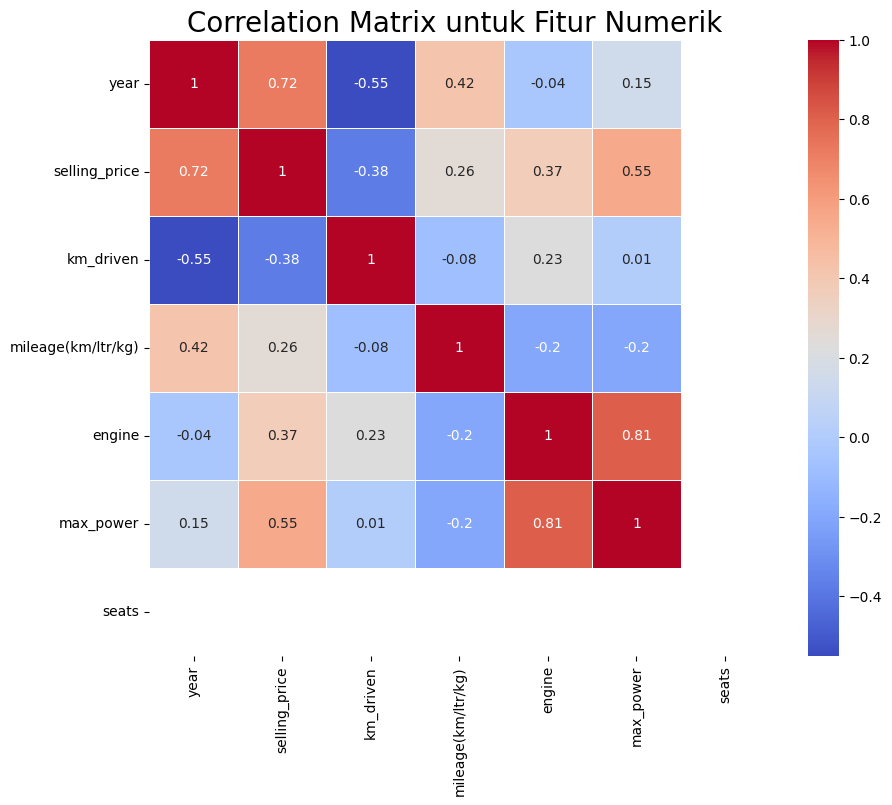

In [1271]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_feature].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Drop fitur yang tidak memiliki korelasi yang baik

In [1272]:
df.drop(['engine', 'max_power'], inplace=True, axis=1)
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage(km/ltr/kg)  seats    brand  
0   First Owner               23.40    5.0   Maruti  
1  Second Owner               21.14    5.0    Skoda  
2   Third Owner               17.70    5.0    Honda  
3   First Owner               23.00    5.0  Hyundai  
4   First Owner               16.10    5.0   Maruti

Mari kita lakukan proses encoding ini dengan fitur get_dummies

In [1273]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['fuel'], prefix='fuel')],axis=1)
df = pd.concat([df, pd.get_dummies(df['seller_type'], prefix='seller_type')],axis=1)
df = pd.concat([df, pd.get_dummies(df['transmission'], prefix='transmission')],axis=1)
df = pd.concat([df, pd.get_dummies(df['owner'], prefix='owner')],axis=1)
df = pd.concat([df, pd.get_dummies(df['brand'], prefix='brand')],axis=1)

df.drop(['fuel','seller_type','transmission','owner','brand' ], axis=1, inplace=True)
df.head()

year  selling_price  km_driven  mileage(km/ltr/kg)  seats  fuel_CNG  \
0  2014         450000     145500               23.40    5.0     False   
1  2014         370000     120000               21.14    5.0     False   
2  2006         158000     140000               17.70    5.0     False   
3  2010         225000     127000               23.00    5.0     False   
4  2007         130000     120000               16.10    5.0     False   

   fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Dealer  ...  brand_Maruti  \
0         True     False        False               False  ...          True   
1         True     False        False               False  ...         False   
2        False     False         True               False  ...         False   
3         True     False        False               False  ...         False   
4        False     False         True               False  ...          True   

   brand_Mercedes-Benz  brand_Mitsubishi  brand_Nissan  brand_Renault  \
0                False             False         False          False   
1                False             False         False          False   
2                False             False         False          False   
3                False             False         False          False   
4                False             False         False          False   

   brand_Skoda  brand_Tata  brand_Toyota  brand_Volkswagen  brand_Volvo  
0        False       False         False             False        False  
1         True       False         False             False        False  
2        False       False         False             False        False  
3        False       False         False             False        False  
4        False       False         False             False        False  

[5 rows x 37 columns]

c:\Users\GILBERT\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


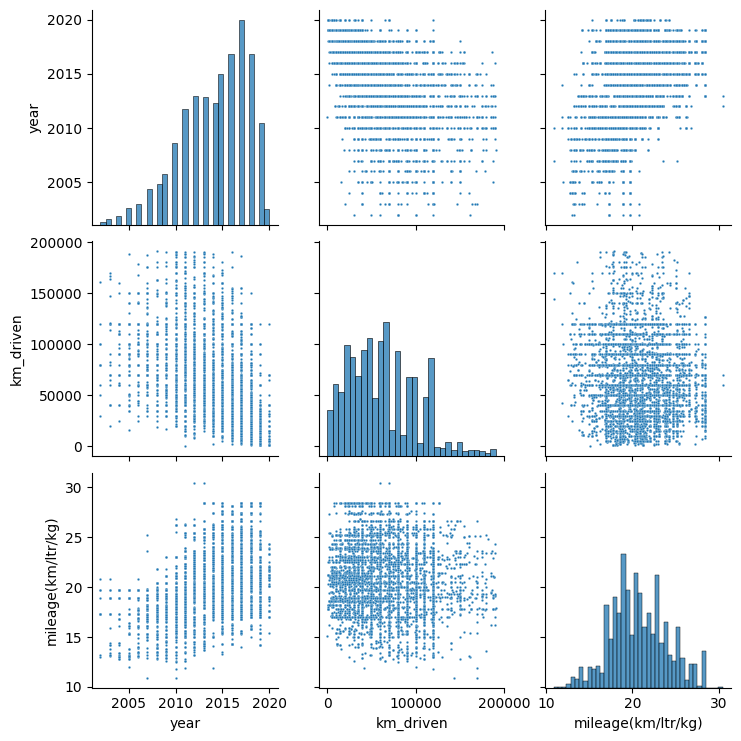

In [1274]:
sns.pairplot(df[['year','km_driven','mileage(km/ltr/kg)']], plot_kws={"s": 3});

Menggunakan PCA untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier, disebut komponen utama (PC). Komponen utama ini dapat menangkap sebagian besar varians dalam variabel asli. Sehingga, saat teknik PCA diterapkan pada data, ia hanya akan menggunakan komponen utama dan mengabaikan sisanya. 

In [1275]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(df[['year','km_driven','mileage(km/ltr/kg)']])
princ_comp = pca.transform(df[['year','km_driven','mileage(km/ltr/kg)']])

setelah menerapkan class PCA, kita bisa mengetahui proporsi informasi dari ketiga komponen tadi.

In [1276]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

Sekarang Anda akan membuat fitur baru bernama 'dimension' untuk menggantikan fitur 'year','km_driven','mileage(km/ltr/kg)'

In [1277]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['year','km_driven','mileage(km/ltr/kg)']])
df['dimension'] = pca.transform(df.loc[:, ('year','km_driven','mileage(km/ltr/kg)')]).flatten()


In [1278]:
df.head()

year  selling_price  km_driven  mileage(km/ltr/kg)  seats  fuel_CNG  \
0  2014         450000     145500               23.40    5.0     False   
1  2014         370000     120000               21.14    5.0     False   
2  2006         158000     140000               17.70    5.0     False   
3  2010         225000     127000               23.00    5.0     False   
4  2007         130000     120000               16.10    5.0     False   

   fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Dealer  ...  \
0         True     False        False               False  ...   
1         True     False        False               False  ...   
2        False     False         True               False  ...   
3         True     False        False               False  ...   
4        False     False         True               False  ...   

   brand_Mercedes-Benz  brand_Mitsubishi  brand_Nissan  brand_Renault  \
0                False             False         False          False   
1                False             False         False          False   
2                False             False         False          False   
3                False             False         False          False   
4                False             False         False          False   

   brand_Skoda  brand_Tata  brand_Toyota  brand_Volkswagen  brand_Volvo  \
0        False       False         False             False        False   
1         True       False         False             False        False   
2        False       False         False             False        False   
3        False       False         False             False        False   
4        False       False         False             False        False   

      dimension  
0  82305.618247  
1  56805.618296  
2  76805.618704  
3  63805.618481  
4  56805.618689  

[5 rows x 38 columns]

Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus kita lakukan sebelum membuat model.

In [1279]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["selling_price"],axis =1)
y = df["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Mengecek jumlah sampel pada masing-masing bagian

In [1280]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5639
Total # of sample in train dataset: 5075
Total # of sample in test dataset: 564


StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. 

In [1281]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['year','km_driven','mileage(km/ltr/kg)','dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

year  km_driven  mileage(km/ltr/kg)  dimension
5441 -1.119179  -0.086403           -2.419118  -0.086403
482   0.263987   1.444618            0.966449   1.444618
832   0.263987  -1.254131            0.609426  -1.254131
3819 -2.225712   1.323200           -0.911002   1.323200
5377  0.540620   0.432587           -0.344689   0.432587

In [1282]:
X_train[numerical_features].describe().round(4)

year  km_driven  mileage(km/ltr/kg)  dimension
count  5075.0000  5075.0000           5075.0000  5075.0000
mean      0.0000     0.0000              0.0000     0.0000
std       1.0001     1.0001              1.0001     1.0001
min      -3.3322    -1.6174             -3.0347    -1.6174
25%      -0.5659    -0.8130             -0.6648    -0.8130
50%       0.2640    -0.0864             -0.0769    -0.0864
75%       0.8173     0.6921              0.6894     0.6921
max       1.6472     3.3130              2.9855     3.3130

Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1

Siapkan dataframe untuk analisis model

Pada tahap ini, mengembangkan model machine learning dengan tiga algoritma('KNN', 'RandomForest', 'Boosting'). Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik

In [1283]:

models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [1284]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [1285]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

In [1286]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

setelah model selesai dilatih dengan 3 algoritma, yaitu KNN, Random Forest, dan Adaboost, kita perlu melakukan proses scaling terhadap data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.

In [1287]:

X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [1294]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing 
for item, model in model_dict.items():
    mse.loc[item, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[item, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
   
 
# Panggil mse
mse

train             test
KNN        8978007.429731  11471841.501695
RF         1397501.251642   6077409.280176
Boosting  19216221.717834  18590823.955337

Untuk memudahkan, mari kita plot metrik tersebut dengan bar chart.

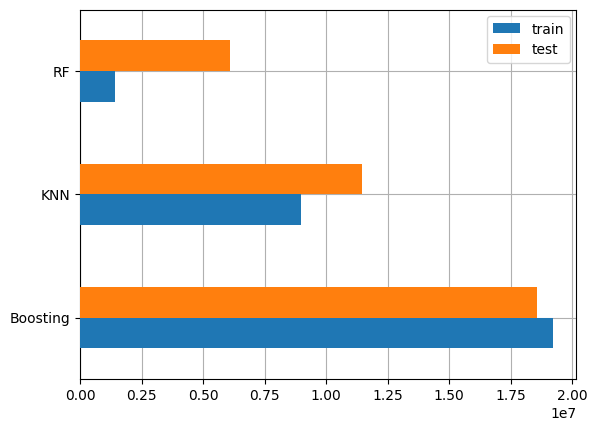

In [1292]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Untuk mengujinya, mari kita buat prediksi menggunakan beberapa harga dari data test.

In [1290]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting
6055  600000      560999.9     495499.3           626856.6

Terlihat bahwa prediksi dengan AdaBoostRegressor(Boosting) memberikan hasil yang paling mendekati.